# Capstone Project - The Battle of Neighborhoods (Week 1)

### Find a best neighbor to start high end Asian Cuisine in San Francisco

# Introduction

***A Famous Asian resturant chain: XYZ -  is looking for launch their first store in San Francisco. 
XYZ are selling the high end Asian Cuisine with price range 100 - 200 USD per person. 
They may want to compare which neighbor has the better purchasing power and then make check the venue size. 
Their business does require a large venue. Also, XYZ managements wishs to set their stores in a safe neighbor with less asian cusine.   ***

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>

1. <a href="#item1">Download and Explore Dataset</a>

2. <a href="#item2">Explore Neighborhoods San Francisco</a>

3. <a href="#item3">Analyze Each Neighborhood</a>

4. <a href="#item4">Cluster Neighborhoods</a>

5. <a href="#item5">Examine Clusters</a>    
   
</font>
</div>

Before we get the data and start exploring it, let's import all libraries that we will need.

In [1]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis


import json # library to handle JSON files


import requests
from bs4 import BeautifulSoup

#importing matplotlib and necessary modules
import matplotlib.cm as cm
import matplotlib.colors as colors

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


# 1. Download and Explore Dataset

Load the San Francisco neighbors data

In [2]:
response = requests.get("http://www.healthysf.org/bdi/outcomes/zipmap.htm")
soup = BeautifulSoup(response.text, "lxml")
table = soup.find_all("table")
df_sf = pd.read_html(str(table))
df_sf = pd.DataFrame(df_sf[4])
df_sf.columns = df_sf.iloc[0]
df_sf = df_sf.iloc[1:-1, :-1]
df_sf

,Zip Code,Neighborhood
1,94102,Hayes Valley/Tenderloin/North of Market
2,94103,South of Market
3,94107,Potrero Hill
4,94108,Chinatown
5,94109,Polk/Russian Hill (Nob Hill)
6,94110,Inner Mission/Bernal Heights
7,94112,Ingelside-Excelsior/Crocker-Amazon
8,94114,Castro/Noe Valley
9,94115,Western Addition/Japantown
10,94116,Parkside/Forest Hill


**Add the lattitude and the longitude to dataframe**

In [3]:
!pip install uszipcode
from uszipcode import SearchEngine

search = SearchEngine(simple_zipcode=True)

latitude = []
longitude = []

for index, row in df_sf.iterrows():
    zipcode = search.by_zipcode(row["Zip Code"]).to_dict()
    latitude.append(zipcode.get("lat"))
    longitude.append(zipcode.get("lng"))

df_sf["Latitude"] = latitude
df_sf["Longitude"] = longitude

# Drop any null values
df_sf.dropna(inplace=True)
df_sf.head()

,Zip Code,Neighborhood,Latitude,Longitude
1,94102,Hayes Valley/Tenderloin/North of Market,37.780,-122.420
2,94103,South of Market,37.780,-122.410
3,94107,Potrero Hill,37.770,-122.390
4,94108,Chinatown,37.791,-122.409
5,94109,Polk/Russian Hill (Nob Hill),37.790,-122.420


In [4]:
df_sf.shape

(21, 4)

**Get the San Francisco Map**

In [5]:
latitude = 37.7792808
longitude = -122.4192363

print('The geograpical coordinate of San Francisco are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of San Francisco are 37.7792808, -122.4192363.


In [6]:
sf_map = folium.Map(location=[latitude, longitude], zoom_start=11)

for lat, lng, label in zip(df_sf['Latitude'], df_sf['Longitude'], df_sf['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(sf_map)  
    
sf_map

# 2.Explore Neighborhoods San Francisco

**a.Check Neighboorhood Income**

In [7]:
#import the data 
sf_income= pd.read_csv('SF Household Income by Zip.csv')
sf_income.head()

,Unnamed: 0,Zipcode,Latitude,Longitude,City,Population,Avg. Income/H/hold\t
0,1,94127,37.737,-122.457,"San Francisco, California","20,624",95313.0
1,2,94105,37.789,-122.395,"San Francisco, California","2,058",88976.0
2,3,94123,37.800,-122.437,"San Francisco, California","22,903",84710.0
3,4,94130,37.821,-122.370,"San Francisco, California","1,453",80959.0
4,5,94131,37.747,-122.443,"San Francisco, California","27,897",76044.0


Rank the neighbors with Household Income

In [8]:
sf_income=sf_income.sort_values(by='Avg. Income/H/hold\t', ascending=False)

/Users/rebeccayuhan/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/rebeccayuhan/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


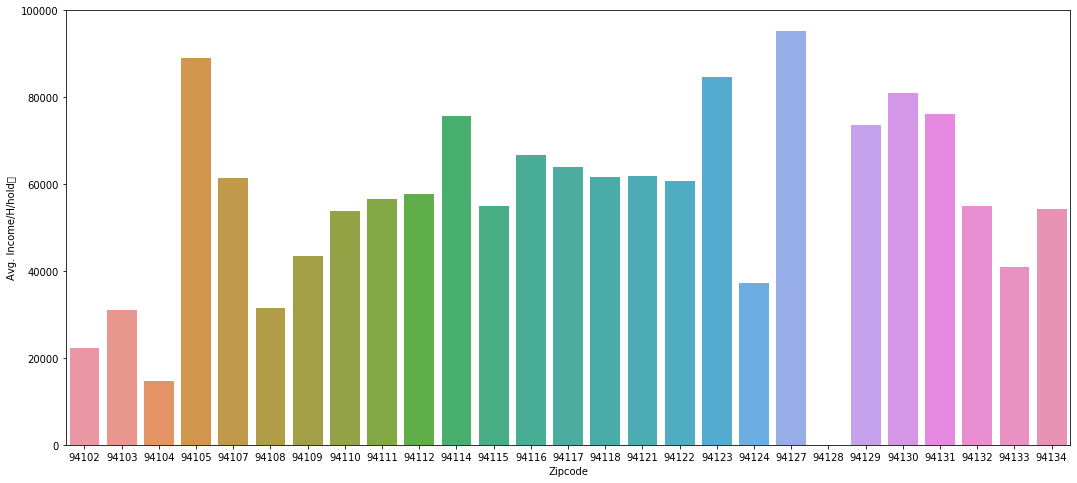

In [9]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(18,8))
income_rank=sns.barplot(x='Zipcode',y='Avg. Income/H/hold\t',data=sf_income)

In [10]:
sf_income.head()

,Unnamed: 0,Zipcode,Latitude,Longitude,City,Population,Avg. Income/H/hold\t
0,1,94127,37.737,-122.457,"San Francisco, California","20,624",95313.0
1,2,94105,37.789,-122.395,"San Francisco, California","2,058",88976.0
2,3,94123,37.800,-122.437,"San Francisco, California","22,903",84710.0
3,4,94130,37.821,-122.370,"San Francisco, California","1,453",80959.0
4,5,94131,37.747,-122.443,"San Francisco, California","27,897",76044.0


We noticed that the top 3 highest average household income are 94127，94105，94123

**b.Check Neighboorhood Safety**

In [11]:
#import the police report
sf_crime=pd.read_csv('Police_Department_Incident_Reports__2018_to_Present.csv')
sf_crime.head()

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,...,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,HSOC Zones as of 2018-06-05,OWED Public Spaces,Central Market/Tenderloin Boundary Polygon - Updated,Parks Alliance CPSI (27+TL sites),ESNCAG - Boundary File,"Areas of Vulnerability, 2016"
0,2019/05/01 01:00:00 AM,2019/05/01,01:00,2019,Wednesday,2019/06/12 08:27:00 PM,81097515200,810975,190424067,191634131.0,...,39.0,10.0,7.0,35.0,NaN,NaN,NaN,NaN,NaN,1.0
1,2019/06/22 07:45:00 AM,2019/06/22,07:45,2019,Saturday,2019/06/22 08:05:00 AM,81465564020,814655,190450880,191730737.0,...,32.0,1.0,10.0,34.0,1.0,NaN,1.0,NaN,NaN,2.0
2,2019/06/03 04:16:00 PM,2019/06/03,16:16,2019,Monday,2019/06/03 04:16:00 PM,80769875000,807698,190397016,191533509.0,...,88.0,2.0,9.0,1.0,NaN,NaN,NaN,NaN,NaN,2.0
3,2018/11/16 04:34:00 PM,2018/11/16,16:34,2018,Friday,2018/11/16 04:34:00 PM,73857915041,738579,180870806,183202539.0,...,104.0,6.0,3.0,6.0,NaN,18.0,NaN,NaN,NaN,2.0
4,2019/05/27 02:25:00 AM,2019/05/27,02:25,2019,Monday,2019/05/27 02:55:00 AM,80509204134,805092,190378555,191470256.0,...,15.0,4.0,6.0,13.0,NaN,NaN,NaN,NaN,NaN,1.0


In [12]:
#remove the unnecessary column 
sf_crime=sf_crime[['Incident Date','Incident ID','Analysis Neighborhood',
                  'Supervisor District','Latitude','Longitude']]
sf_crime

,Incident Date,Incident ID,Analysis Neighborhood,Supervisor District,Latitude,Longitude
0,2019/05/01,810975,Sunset/Parkside,4.0,37.762569,-122.499627
1,2019/06/22,814655,South of Market,6.0,37.780535,-122.408161
2,2019/06/03,807698,Bayview Hunters Point,10.0,37.721600,-122.390745
3,2018/11/16,738579,Chinatown,3.0,37.794860,-122.404876
4,2019/05/27,805092,Marina,2.0,37.797716,-122.430559
...,...,...,...,...,...,...
362005,2019/03/25,783452,Tenderloin,6.0,37.780927,-122.413676
362006,2019/05/01,796571,Mission,8.0,37.766406,-122.424258
362007,2019/08/05,831047,Castro/Upper Market,8.0,37.759830,-122.425920
362008,2019/04/23,793677,West of Twin Peaks,7.0,37.726132,-122.464573


In [13]:
sf_crime_rank=sf_crime['Analysis Neighborhood'].value_counts(ascending=True)
sf_crime_rank.head()

McLaren Park        354
Seacliff            395
Lincoln Park        424
Presidio            790
Treasure Island    1125
Name: Analysis Neighborhood, dtype: int64

From the result above, we can see that the these neighborhoods have the relative low number of police reports.

# 3. Analyze Each Neighborhood

**FourSquare Credential**

In [14]:
CLIENT_ID = '3CPCOSTQQFIJR45CANEZ1DPB3XNPYQXRJBVKIUP4PUAFVYVF'
CLIENT_SECRET = 'AWA15AEGXWMQHS1NPXORLGVX33R0L4SAHSJZSRHR5TTWRCSU'
VERSION = '20200701'

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 3CPCOSTQQFIJR45CANEZ1DPB3XNPYQXRJBVKIUP4PUAFVYVF
CLIENT_SECRET:AWA15AEGXWMQHS1NPXORLGVX33R0L4SAHSJZSRHR5TTWRCSU


In [15]:
def getNearbyVenues(names, latitudes, longitudes, radius=600):
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        # API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        # GET request for venues
        results = requests.get(url).json()["response"]['groups'][0]['items']
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    return(nearby_venues)

In [16]:
LIMIT=10000
sf_venues = getNearbyVenues(names=df_sf['Neighborhood'],
                                   latitudes=df_sf['Latitude'],
                                   longitudes=df_sf['Longitude']
                                  )

In [17]:
print(sf_venues.shape)
sf_venues.head()

(1299, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Hayes Valley/Tenderloin/North of Market,37.78,-122.42,War Memorial Opera House,37.778601,-122.420816,Opera House
1,Hayes Valley/Tenderloin/North of Market,37.78,-122.42,San Francisco Ballet,37.778580,-122.420798,Dance Studio
2,Hayes Valley/Tenderloin/North of Market,37.78,-122.42,Herbst Theater,37.779548,-122.420953,Concert Hall
3,Hayes Valley/Tenderloin/North of Market,37.78,-122.42,Louise M. Davies Symphony Hall,37.777976,-122.420157,Concert Hall
4,Hayes Valley/Tenderloin/North of Market,37.78,-122.42,War Memorial Court,37.779042,-122.420971,Park


In [18]:
sf_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Bayview-Hunters Point,6,6,6,6,6,6
Castro/Noe Valley,83,83,83,83,83,83
Chinatown,100,100,100,100,100,100
Haight-Ashbury,55,55,55,55,55,55
Hayes Valley/Tenderloin/North of Market,100,100,100,100,100,100
Ingelside-Excelsior/Crocker-Amazon,59,59,59,59,59,59
Inner Mission/Bernal Heights,69,69,69,69,69,69
Inner Richmond,79,79,79,79,79,79
Lake Merced,24,24,24,24,24,24


**how many unique categories can be curated from all the returned venues**

In [19]:
print('There are {} uniques categories.'.format(len(sf_venues['Venue Category'].unique())))

There are 243 uniques categories.


In [20]:
# one hot encoding
sf_onehot = pd.get_dummies(sf_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
sf_onehot['Neighborhood'] = sf_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [sf_onehot.columns[-1]] + list(sf_onehot.columns[:-1])
sf_onehot = sf_onehot[fixed_columns]

sf_onehot.head()

,Neighborhood,ATM,Accessories Store,Adult Boutique,Alternative Healer,American Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Turkish Restaurant,Vegetarian / Vegan Restaurant,Veterinarian,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Hayes Valley/Tenderloin/North of Market,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Hayes Valley/Tenderloin/North of Market,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Hayes Valley/Tenderloin/North of Market,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Hayes Valley/Tenderloin/North of Market,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Hayes Valley/Tenderloin/North of Market,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
sf_onehot.shape

(1299, 244)

 **Group rows by neighborhood and by taking the mean of the frequency of occurrence of each category**

In [22]:
sf_grouped = sf_onehot.groupby('Neighborhood').mean().reset_index()
sf_grouped

,Neighborhood,ATM,Accessories Store,Adult Boutique,Alternative Healer,American Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Turkish Restaurant,Vegetarian / Vegan Restaurant,Veterinarian,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Bayview-Hunters Point,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
1,Castro/Noe Valley,0.000000,0.000000,0.012048,0.000000,0.012048,0.000000,0.00,0.012048,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.024096,0.012048,0.00,0.000000,0.024096
2,Chinatown,0.000000,0.000000,0.000000,0.000000,0.020000,0.030000,0.00,0.000000,0.010000,...,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.00,0.000000,0.010000
3,Haight-Ashbury,0.000000,0.018182,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,...,0.000000,0.018182,0.000000,0.000000,0.000000,0.036364,0.000000,0.00,0.000000,0.018182
4,Hayes Valley/Tenderloin/North of Market,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000,0.01,0.000000,0.000000,...,0.000000,0.010000,0.000000,0.000000,0.050000,0.020000,0.000000,0.00,0.000000,0.010000
5,Ingelside-Excelsior/Crocker-Amazon,0.000000,0.000000,0.000000,0.000000,0.016949,0.000000,0.00,0.000000,0.016949,...,0.000000,0.000000,0.000000,0.000000,0.050847,0.000000,0.000000,0.00,0.000000,0.000000
6,Inner Mission/Bernal Heights,0.000000,0.000000,0.000000,0.000000,0.000000,0.028986,0.00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.014493,0.000000,0.000000,0.00,0.000000,0.028986
7,Inner Richmond,0.012658,0.000000,0.000000,0.000000,0.000000,0.012658,0.00,0.000000,0.012658,...,0.012658,0.000000,0.000000,0.000000,0.025316,0.025316,0.025316,0.00,0.012658,0.000000
8,Lake Merced,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
9,Marina,0.000000,0.000000,0.000000,0.012346,0.024691,0.000000,0.00,0.012346,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.012346,0.037037,0.012346,0.00,0.000000,0.012346


In [23]:
sf_grouped.shape

(20, 244)

**Each neighborhood along with the top 5 most common venues**

In [24]:
num_top_venues = 5

for hood in sf_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = sf_grouped[sf_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Bayview-Hunters Point----
                        venue  freq
0               Deli / Bodega  0.17
1                 Coffee Shop  0.17
2             Motorcycle Shop  0.17
3           Food & Drink Shop  0.17
4  Construction & Landscaping  0.17


----Castro/Noe Valley----
               venue  freq
0            Gay Bar  0.08
1               Park  0.05
2    Thai Restaurant  0.05
3        Coffee Shop  0.04
4  Convenience Store  0.04


----Chinatown----
                venue  freq
0               Hotel  0.09
1  Italian Restaurant  0.04
2         Coffee Shop  0.04
3     Bubble Tea Shop  0.04
4            Boutique  0.04


----Haight-Ashbury----
            venue  freq
0     Coffee Shop  0.07
1  Ice Cream Shop  0.05
2      Playground  0.04
3        Wine Bar  0.04
4     Record Shop  0.04


----Hayes Valley/Tenderloin/North of Market----
                   venue  freq
0            Coffee Shop  0.06
1  Vietnamese Restaurant  0.05
2        Thai Restaurant  0.03
3           Cocktail Bar  0.03
4 

**put that into a pandas dataframe**

In [25]:
# sort the venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

**create the new dataframe and display the top 10 venues for each neighborhood**

In [26]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] =sf_grouped['Neighborhood']

for ind in np.arange(sf_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(sf_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bayview-Hunters Point,Deli / Bodega,Construction & Landscaping,Motorcycle Shop,Food & Drink Shop,Park,Coffee Shop,Diner,Fast Food Restaurant,Department Store,Food Truck
1,Castro/Noe Valley,Gay Bar,Thai Restaurant,Park,Convenience Store,Coffee Shop,Yoga Studio,Grocery Store,Hill,Deli / Bodega,Cosmetics Shop
2,Chinatown,Hotel,Italian Restaurant,Boutique,Bubble Tea Shop,Coffee Shop,Gym / Fitness Center,Art Gallery,Electronics Store,Men's Store,Burger Joint
3,Haight-Ashbury,Coffee Shop,Ice Cream Shop,Park,Grocery Store,Wine Bar,Scenic Lookout,Boutique,Playground,Record Shop,Costume Shop
4,Hayes Valley/Tenderloin/North of Market,Coffee Shop,Vietnamese Restaurant,Thai Restaurant,Dessert Shop,Sandwich Place,Cocktail Bar,Theater,Poke Place,Southern / Soul Food Restaurant,Park


# 4.Cluster Neighborhoods

**Run k-means to cluster the neighborhood into 5 clusters.**

In [27]:
# set number of clusters
kclusters = 5

sf_grouped_clustering = sf_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(sf_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 0, 0, 0, 0, 0, 0, 0, 3, 0], dtype=int32)

**Create new dataframe that includes the cluster as well as the top 10 venues for each neighborhood**

In [28]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

sf_merged =df_sf

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
sf_merged =sf_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

sf_merged.head()

,Zip Code,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,94102,Hayes Valley/Tenderloin/North of Market,37.780,-122.420,0.0,Coffee Shop,Vietnamese Restaurant,Thai Restaurant,Dessert Shop,Sandwich Place,Cocktail Bar,Theater,Poke Place,Southern / Soul Food Restaurant,Park
2,94103,South of Market,37.780,-122.410,0.0,Coffee Shop,Bakery,Marijuana Dispensary,Beer Bar,Theater,Sandwich Place,Vietnamese Restaurant,Hotel,Bar,Cocktail Bar
3,94107,Potrero Hill,37.770,-122.390,0.0,Food Truck,Coffee Shop,Park,Gym / Fitness Center,Pharmacy,Café,New American Restaurant,Bank,Street Food Gathering,Pizza Place
4,94108,Chinatown,37.791,-122.409,0.0,Hotel,Italian Restaurant,Boutique,Bubble Tea Shop,Coffee Shop,Gym / Fitness Center,Art Gallery,Electronics Store,Men's Store,Burger Joint
5,94109,Polk/Russian Hill (Nob Hill),37.790,-122.420,0.0,Sushi Restaurant,Grocery Store,Bar,Gym,Wine Bar,Massage Studio,Café,Convenience Store,Steakhouse,Sandwich Place


**Visualize the resulting clusters**

In [31]:
sf_merged.isnull()
sf_merged.dropna(inplace=True)

In [32]:
sf_merged['Cluster Labels'] =sf_merged['Cluster Labels'].astype(int)

In [34]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(sf_merged['Latitude'],sf_merged['Longitude'], sf_merged['Neighborhood'], sf_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# 5.Examine Clusters

#### Cluster 1

In [36]:
sf_merged.loc[sf_merged['Cluster Labels'] == 0, 
                   sf_merged.columns[[1] + list(range(5, sf_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Hayes Valley/Tenderloin/North of Market,Coffee Shop,Vietnamese Restaurant,Thai Restaurant,Dessert Shop,Sandwich Place,Cocktail Bar,Theater,Poke Place,Southern / Soul Food Restaurant,Park
2,South of Market,Coffee Shop,Bakery,Marijuana Dispensary,Beer Bar,Theater,Sandwich Place,Vietnamese Restaurant,Hotel,Bar,Cocktail Bar
3,Potrero Hill,Food Truck,Coffee Shop,Park,Gym / Fitness Center,Pharmacy,Café,New American Restaurant,Bank,Street Food Gathering,Pizza Place
4,Chinatown,Hotel,Italian Restaurant,Boutique,Bubble Tea Shop,Coffee Shop,Gym / Fitness Center,Art Gallery,Electronics Store,Men's Store,Burger Joint
5,Polk/Russian Hill (Nob Hill),Sushi Restaurant,Grocery Store,Bar,Gym,Wine Bar,Massage Studio,Café,Convenience Store,Steakhouse,Sandwich Place
6,Inner Mission/Bernal Heights,Mexican Restaurant,Grocery Store,Coffee Shop,Pizza Place,Italian Restaurant,Burrito Place,Gym / Fitness Center,New American Restaurant,Deli / Bodega,Restaurant
7,Ingelside-Excelsior/Crocker-Amazon,Pizza Place,Mexican Restaurant,Latin American Restaurant,Vietnamese Restaurant,Chinese Restaurant,Bakery,Coffee Shop,Pharmacy,Bubble Tea Shop,Bank
8,Castro/Noe Valley,Gay Bar,Thai Restaurant,Park,Convenience Store,Coffee Shop,Yoga Studio,Grocery Store,Hill,Deli / Bodega,Cosmetics Shop
9,Western Addition/Japantown,Cosmetics Shop,Spa,Park,Gym / Fitness Center,Sandwich Place,Salon / Barbershop,Chinese Restaurant,Pizza Place,Bakery,Mediterranean Restaurant
11,Haight-Ashbury,Coffee Shop,Ice Cream Shop,Park,Grocery Store,Wine Bar,Scenic Lookout,Boutique,Playground,Record Shop,Costume Shop


#### Cluster 2

In [37]:
sf_merged.loc[sf_merged['Cluster Labels'] == 1, 
                   sf_merged.columns[[1] + list(range(5, sf_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
21,Visitacion Valley/Sunnydale,Baseball Field,Garden,Park,Scenic Lookout,Event Space,Food Truck,Food Stand,Food & Drink Shop,Fondue Restaurant,Flower Shop


#### Cluster 3

In [38]:
sf_merged.loc[sf_merged['Cluster Labels'] == 2, 
                   sf_merged.columns[[1] + list(range(5, sf_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
16,Bayview-Hunters Point,Deli / Bodega,Construction & Landscaping,Motorcycle Shop,Food & Drink Shop,Park,Coffee Shop,Diner,Fast Food Restaurant,Department Store,Food Truck


#### Cluster 4

In [39]:
sf_merged.loc[sf_merged['Cluster Labels'] == 3, 
                   sf_merged.columns[[1] + list(range(5, sf_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
19,Lake Merced,Pizza Place,Café,Rental Car Location,Coffee Shop,Sandwich Place,Mexican Restaurant,Cocktail Bar,Dog Run,Smoke Shop,Performing Arts Venue


#### Cluster 5

In [40]:
sf_merged.loc[sf_merged['Cluster Labels'] == 4, 
                   sf_merged.columns[[1] + list(range(5, sf_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,Parkside/Forest Hill,Chinese Restaurant,Bubble Tea Shop,Park,Pizza Place,Sushi Restaurant,Café,Sandwich Place,Pub,Snack Place,Burrito Place
14,Sunset,Chinese Restaurant,Bubble Tea Shop,Bakery,Vietnamese Restaurant,Dumpling Restaurant,Grocery Store,Deli / Bodega,Dessert Shop,Szechuan Restaurant,Dim Sum Restaurant


# Conclusion 

We noticed lot of the neighborhoods are in the cluster 3 . San Francisco has so many resturant. where should XYZ put their new restaurant? By checking out the crime and household income data, it appears that the North Beach neighborhood might be a good candidate for XYZ company. 